In [104]:
import pandas as pd

In [144]:
kraken_data = pd.read_csv("../SD281294_mph.bracken",sep='\t')

In [145]:
kraken_data_sub = kraken_data[kraken_data["fraction_total_reads"] > 0.00001]

In [146]:
kraken_data_sub

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Blautia obeum,40520,S,4471727,760343,5232070,0.12905
1,Blautia wexlerae,418240,S,2812096,4201849,7013945,0.17300
2,Blautia producta,33035,S,40706,12121,52827,0.00130
3,Blautia hansenii,1322,S,32737,3107,35844,0.00088
4,Blautia argi,1912897,S,12073,1165,13238,0.00033
...,...,...,...,...,...,...,...
7301,Fusobacterium necrophorum,859,S,662,20,682,0.00002
7310,Treponema bryantii,163,S,606,6,612,0.00002
7378,Pyramidobacter sp. C12-8,1943580,S,2110,39,2149,0.00005
7379,Cloacibacillus porcorum,1197717,S,588,65,653,0.00002


In [147]:
t = kraken_data_sub["name"].str.split(" ")
kraken_data_sub["kraken_name"] = t.str.join("_")

/tmp/ipykernel_457807/3908293582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kraken_data_sub["kraken_name"] = t.str.join("_")


In [148]:
kraken_data_sub

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,kraken_name
0,Blautia obeum,40520,S,4471727,760343,5232070,0.12905,Blautia_obeum
1,Blautia wexlerae,418240,S,2812096,4201849,7013945,0.17300,Blautia_wexlerae
2,Blautia producta,33035,S,40706,12121,52827,0.00130,Blautia_producta
3,Blautia hansenii,1322,S,32737,3107,35844,0.00088,Blautia_hansenii
4,Blautia argi,1912897,S,12073,1165,13238,0.00033,Blautia_argi
...,...,...,...,...,...,...,...,...
7301,Fusobacterium necrophorum,859,S,662,20,682,0.00002,Fusobacterium_necrophorum
7310,Treponema bryantii,163,S,606,6,612,0.00002,Treponema_bryantii
7378,Pyramidobacter sp. C12-8,1943580,S,2110,39,2149,0.00005,Pyramidobacter_sp._C12-8
7379,Cloacibacillus porcorum,1197717,S,588,65,653,0.00002,Cloacibacillus_porcorum


In [149]:
gs_df = kraken_data_sub['name'].str.split(expand=True)
gs_df = gs_df.dropna(axis=1)
kraken_data_sub[['genus','species']] = gs_df

kraken_data_sub_new = kraken_data_sub[['genus','species','kraken_assigned_reads','added_reads','new_est_reads','fraction_total_reads']]

/tmp/ipykernel_457807/2560506122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kraken_data_sub[['genus','species']] = gs_df
/tmp/ipykernel_457807/2560506122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kraken_data_sub[['genus','species']] = gs_df


In [150]:
kraken_data_sub_new

,genus,species,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Blautia,obeum,4471727,760343,5232070,0.12905
1,Blautia,wexlerae,2812096,4201849,7013945,0.17300
2,Blautia,producta,40706,12121,52827,0.00130
3,Blautia,hansenii,32737,3107,35844,0.00088
4,Blautia,argi,12073,1165,13238,0.00033
...,...,...,...,...,...,...
7301,Fusobacterium,necrophorum,662,20,682,0.00002
7310,Treponema,bryantii,606,6,612,0.00002
7378,Pyramidobacter,sp.,2110,39,2149,0.00005
7379,Cloacibacillus,porcorum,588,65,653,0.00002


In [151]:
kraken_data_sub_new = kraken_data_sub_new.replace("[Ruminococcus]","Ruminococcus")
kraken_data_sub_new = kraken_data_sub_new.replace("[Clostridium]","Clostridium")


In [152]:
kraken_data_sub_new = kraken_data_sub_new.replace("[Collinsella]","Collinsella")

In [153]:
kraken_data_sub_new 

,genus,species,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Blautia,obeum,4471727,760343,5232070,0.12905
1,Blautia,wexlerae,2812096,4201849,7013945,0.17300
2,Blautia,producta,40706,12121,52827,0.00130
3,Blautia,hansenii,32737,3107,35844,0.00088
4,Blautia,argi,12073,1165,13238,0.00033
...,...,...,...,...,...,...
7301,Fusobacterium,necrophorum,662,20,682,0.00002
7310,Treponema,bryantii,606,6,612,0.00002
7378,Pyramidobacter,sp.,2110,39,2149,0.00005
7379,Cloacibacillus,porcorum,588,65,653,0.00002


In [154]:
kraken_data_genus = kraken_data_sub_new.groupby(['genus','species'])[['kraken_assigned_reads','added_reads','new_est_reads','fraction_total_reads']].sum()

In [155]:
kraken_data_genus

kraken_assigned_reads  added_reads  \
genus               species                                                
Acetanaerobacterium elongatum                          1141           12   
Acetatifactor       muris                              5852          236   
Acetivibrio         clariflavus                         818           30   
                    ethanolgignens                     8892          373   
                    thermocellus                        648           29   
...                                                     ...          ...   
Veillonella         atypica                             726          132   
Vibrio              parahaemolyticus                    915          214   
Victivallis         vadensis                            815            4   
Xanthomonas         arboricola                          584           82   
                    dyei                                 17          762   

                                      new_est_reads  fraction_total_reads  
genus               species                                                
Acetanaerobacterium elongatum                  1153               0.00003  
Acetatifactor       muris                      6088               0.00015  
Acetivibrio         clariflavus                 848               0.00002  
                    ethanolgignens             9265               0.00023  
                    thermocellus                677               0.00002  
...                                             ...                   ...  
Veillonella         atypica                     858               0.00002  
Vibrio              parahaemolyticus           1129               0.00003  
Victivallis         vadensis                    819               0.00002  
Xanthomonas         arboricola                  666               0.00002  
                    dyei                        779               0.00002  

[455 rows x 4 columns]

In [20]:
len(kraken_data_sub["name"].unique())

483

In [156]:
kraken_data_genus = kraken_data_genus.reset_index()

In [157]:
kraken_data_genus

,genus,species,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Acetanaerobacterium,elongatum,1141,12,1153,0.00003
1,Acetatifactor,muris,5852,236,6088,0.00015
2,Acetivibrio,clariflavus,818,30,848,0.00002
3,Acetivibrio,ethanolgignens,8892,373,9265,0.00023
4,Acetivibrio,thermocellus,648,29,677,0.00002
...,...,...,...,...,...,...
450,Veillonella,atypica,726,132,858,0.00002
451,Vibrio,parahaemolyticus,915,214,1129,0.00003
452,Victivallis,vadensis,815,4,819,0.00002
453,Xanthomonas,arboricola,584,82,666,0.00002


In [61]:
len(kraken_data_genus["genus"].unique())

189

In [119]:
mph_data = pd.read_csv("MGS_Species_Results_with_Unique_Species_Count.csv")


In [158]:
mph_data_sub = mph_data[["Species","SD281294"]]

In [159]:
mph_nonzero = mph_data_sub[mph_data_sub["SD281294"] != 0]

In [160]:
gs_df_mph = mph_nonzero['Species'].str.split('_',expand=True)


In [161]:
gs_df_mph = gs_df_mph.dropna(axis=1)
mph_nonzero[['genus','species']] = gs_df_mph 

/tmp/ipykernel_457807/2938097408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mph_nonzero[['genus','species']] = gs_df_mph
/tmp/ipykernel_457807/2938097408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mph_nonzero[['genus','species']] = gs_df_mph


In [162]:
mph_nonzero

,Species,SD281294,genus,species
0,Alkalihalobacillus_clausii,4221,Alkalihalobacillus,clausii
3,Solobacterium_moorei,51301,Solobacterium,moorei
4,Eikenella_corrodens,5213,Eikenella,corrodens
10,Paenibacillus_macerans,9455,Paenibacillus,macerans
11,Enterococcus_hirae,213150,Enterococcus,hirae
...,...,...,...,...
615,Solobacterium_SGB6828,610,Solobacterium,SGB6828
624,Streptococcus_parasanguinis,159,Streptococcus,parasanguinis
628,TM7_phylum_sp_oral_taxon_352,1178,TM7,phylum
640,Zhenpiania_hominis,1562,Zhenpiania,hominis


In [125]:
len(mph_nonzero)

270

In [163]:
mph_data_genus = mph_nonzero.groupby(['genus','species'])['SD281294'].sum()

In [164]:
mph_data_genus = mph_data_genus.reset_index()

In [165]:
mph_data_genus

,genus,species,SD281294
0,Actinomyces,bouchesdurhonensis,11341
1,Actinomyces,graevenitzii,911
2,Actinomyces,sp,42545
3,Adlercreutzia,equolifaciens,235803
4,Adlercreutzia,muris,13163
...,...,...,...
262,Varibaculum,cambriense,5644
263,Vescimonas,coprocola,2527
264,Wansuia,hejianensis,53179
265,Zhenpiania,hominis,1562


In [35]:
merged_df_genus = mph_data_genus.merge(kraken_data_genus,indicator=True,left_on="genus",right_on="genus",how="right")

In [74]:
merged_df_genus

,genus,SD281293,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,_merge
0,Acetanaerobacterium,NaN,1017,10,1027,0.00003,right_only
1,Acetatifactor,NaN,5532,223,5755,0.00015,right_only
2,Acetivibrio,NaN,9564,404,9968,0.00026,right_only
3,Acetobacterium,NaN,752,34,786,0.00002,right_only
4,Acidaminococcus,NaN,1215,43,1258,0.00003,right_only
...,...,...,...,...,...,...,...
184,Variovorax,NaN,712,176,888,0.00002,right_only
185,Veillonella,NaN,656,112,768,0.00002,right_only
186,Vibrio,NaN,826,197,1023,0.00003,right_only
187,Victivallis,NaN,675,4,679,0.00002,right_only


In [12]:
merged_df = mph_nonzero.merge(kraken_data_sub,indicator=True,left_on="Species",right_on="kraken_name",how="right")

In [166]:
mph_data_genus['rel_ab'] = mph_data_genus['SD281294']/mph_data_genus['SD281294'].sum()

In [167]:
mph_data_genus_sub = mph_data_genus[mph_data_genus['rel_ab'] > 0.001]

In [168]:
kraken_data_genus_sub = kraken_data_genus[kraken_data_genus['fraction_total_reads'] > 0.001]

In [169]:
print(len(mph_data_genus_sub))
print(len(kraken_data_genus_sub))

69
43


In [170]:
kraken_data_genus_sub 

,genus,species,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
14,Adlercreutzia,equolifaciens,201231,11415,212646,0.00524
17,Agathobaculum,butyriciproducens,252987,16813,269800,0.00665
20,Akkermansia,muciniphila,121552,1603,123155,0.00304
32,Anaerobutyricum,hallii,757794,54622,812416,0.02004
40,Anaerostipes,hadrus,792579,42958,835537,0.02061
82,Bifidobacterium,longum,152882,50562,203444,0.00502
83,Bifidobacterium,pseudocatenulatum,388366,148405,536771,0.01324
90,Blautia,obeum,4471727,760343,5232070,0.12905
91,Blautia,producta,40706,12121,52827,0.00130
93,Blautia,wexlerae,2812096,4201849,7013945,0.17300


In [171]:
merged_df_genus_sub = mph_data_genus_sub.merge(kraken_data_genus_sub,indicator=True,left_on=["genus","species"],right_on=["genus","species"],how="right")

In [172]:
res = merged_df_genus_sub[merged_df_genus_sub['_merge']=='both']

In [180]:
res.sort_values(by="fraction_total_reads",ascending=False)

,genus,species,SD281294,rel_ab,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,_merge,combined
9,Blautia,wexlerae,10828104.0,0.138576,2812096,4201849,7013945,0.17300,both,Blautia_wexlerae
21,Faecalibacterium,prausnitzii,7544397.0,0.096552,4914295,436551,5350846,0.13198,both,Faecalibacterium_prausnitzii
7,Blautia,obeum,4679826.0,0.059891,4471727,760343,5232070,0.12905,both,Blautia_obeum
38,Ruminococcus,bromii,5739922.0,0.073458,3606357,131148,3737505,0.09219,both,Ruminococcus_bromii
24,Gemmiger,formicilis,5324230.0,0.068138,2672467,278450,2950917,0.07278,both,Gemmiger_formicilis
23,Fusicatenibacter,saccharivorans,2893189.0,0.037026,1020257,1368109,2388366,0.05891,both,Fusicatenibacter_saccharivorans
14,Coprococcus,eutactus,1907680.0,0.024414,1069674,55177,1124851,0.02774,both,Coprococcus_eutactus
4,Anaerostipes,hadrus,1332174.0,0.017049,792579,42958,835537,0.02061,both,Anaerostipes_hadrus
32,Roseburia,faecis,579301.0,0.007414,315570,345536,661106,0.01631,both,Roseburia_faecis
6,Bifidobacterium,pseudocatenulatum,747092.0,0.009561,388366,148405,536771,0.01324,both,Bifidobacterium_pseudocatenulatum


In [181]:
len(res)

25

In [174]:
res["combined"] = res["genus"]+'_'+res["species"]

/tmp/ipykernel_457807/1618901729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["combined"] = res["genus"]+'_'+res["species"]


In [175]:
kraken_data_genus_sub["combined"] = kraken_data_genus_sub["genus"]+'_'+kraken_data_genus_sub["species"]

/tmp/ipykernel_457807/2002679784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kraken_data_genus_sub["combined"] = kraken_data_genus_sub["genus"]+'_'+kraken_data_genus_sub["species"]


In [176]:
mph_data_genus_sub["combined"] = mph_data_genus_sub["genus"]+'_'+mph_data_genus_sub["species"]

/tmp/ipykernel_457807/761668687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mph_data_genus_sub["combined"] = mph_data_genus_sub["genus"]+'_'+mph_data_genus_sub["species"]


In [177]:
kraken_data_genus_sub

,genus,species,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,combined
14,Adlercreutzia,equolifaciens,201231,11415,212646,0.00524,Adlercreutzia_equolifaciens
17,Agathobaculum,butyriciproducens,252987,16813,269800,0.00665,Agathobaculum_butyriciproducens
20,Akkermansia,muciniphila,121552,1603,123155,0.00304,Akkermansia_muciniphila
32,Anaerobutyricum,hallii,757794,54622,812416,0.02004,Anaerobutyricum_hallii
40,Anaerostipes,hadrus,792579,42958,835537,0.02061,Anaerostipes_hadrus
82,Bifidobacterium,longum,152882,50562,203444,0.00502,Bifidobacterium_longum
83,Bifidobacterium,pseudocatenulatum,388366,148405,536771,0.01324,Bifidobacterium_pseudocatenulatum
90,Blautia,obeum,4471727,760343,5232070,0.12905,Blautia_obeum
91,Blautia,producta,40706,12121,52827,0.00130,Blautia_producta
93,Blautia,wexlerae,2812096,4201849,7013945,0.17300,Blautia_wexlerae


In [93]:
mph_data_genus_sub

,genus,species,SD281293,rel_ab,combined
3,Adlercreutzia,equolifaciens,147691,0.002001,Adlercreutzia_equolifaciens
5,Agathobaculum,butyriciproducens,486055,0.006586,Agathobaculum_butyriciproducens
6,Akkermansia,muciniphila,206764,0.002802,Akkermansia_muciniphila
14,Anaerobutyricum,soehngenii,1675495,0.022704,Anaerobutyricum_soehngenii
16,Anaerostipes,hadrus,1367219,0.018527,Anaerostipes_hadrus
...,...,...,...,...,...
236,Roseburia,faecis,463660,0.006283,Roseburia_faecis
237,Roseburia,hominis,404414,0.005480,Roseburia_hominis
241,Ruminococcus,bicirculans,492574,0.006675,Ruminococcus_bicirculans
242,Ruminococcus,bromii,5527800,0.074907,Ruminococcus_bromii


In [178]:
res

,genus,species,SD281294,rel_ab,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,_merge,combined
0,Adlercreutzia,equolifaciens,235803.0,0.003018,201231,11415,212646,0.00524,both,Adlercreutzia_equolifaciens
1,Agathobaculum,butyriciproducens,576588.0,0.007379,252987,16813,269800,0.00665,both,Agathobaculum_butyriciproducens
2,Akkermansia,muciniphila,197269.0,0.002525,121552,1603,123155,0.00304,both,Akkermansia_muciniphila
4,Anaerostipes,hadrus,1332174.0,0.017049,792579,42958,835537,0.02061,both,Anaerostipes_hadrus
5,Bifidobacterium,longum,395892.0,0.005067,152882,50562,203444,0.00502,both,Bifidobacterium_longum
6,Bifidobacterium,pseudocatenulatum,747092.0,0.009561,388366,148405,536771,0.01324,both,Bifidobacterium_pseudocatenulatum
7,Blautia,obeum,4679826.0,0.059891,4471727,760343,5232070,0.12905,both,Blautia_obeum
9,Blautia,wexlerae,10828104.0,0.138576,2812096,4201849,7013945,0.17300,both,Blautia_wexlerae
12,Coprococcus,catus,92860.0,0.001188,48245,5207,53452,0.00132,both,Coprococcus_catus
13,Coprococcus,comes,383618.0,0.004909,358445,59244,417689,0.01030,both,Coprococcus_comes


In [96]:
!pip install matplotlib-venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45289 sha256=2b47ee924567c31d34b0cd190b2fe57872eba9dba0232ff97647578f624693af
  Stored in directory: /mnt/nfs/gigantor/ifs/DCEG/Home/shankaras/.cache/pip/wheels/3c/b6/e2/5fadaf4aa63fac5b079d4f633e9d96b29a67ee4fae816806f3
Successfully built matplotlib-venn


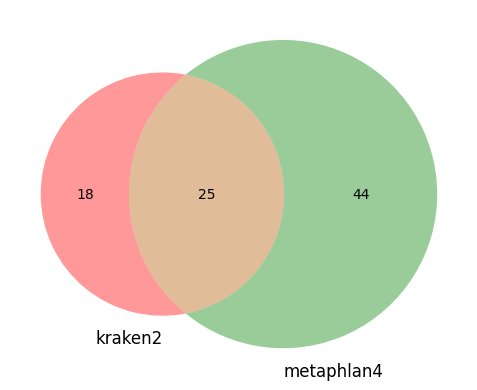

In [179]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

set1 = set(kraken_data_genus_sub["combined"])
set2 = set(mph_data_genus_sub["combined"])

venn2([set1, set2], ('kraken2', 'metaphlan4'))

plt.show()

In [98]:
set1

{'Adlercreutzia_equolifaciens',
 'Agathobaculum_butyriciproducens',
 'Akkermansia_muciniphila',
 'Anaerobutyricum_hallii',
 'Anaerostipes_hadrus',
 'Bifidobacterium_longum',
 'Bifidobacterium_pseudocatenulatum',
 'Blautia_obeum',
 'Blautia_producta',
 'Blautia_wexlerae',
 'Clostridioides_difficile',
 'Collinsella_aerofaciens',
 'Coprococcus_catus',
 'Coprococcus_comes',
 'Coprococcus_eutactus',
 'Dorea_formicigenerans',
 'Dorea_longicatena',
 'Enterococcus_faecium',
 'Enterococcus_hirae',
 'Eubacterium_ramulus',
 'Eubacterium_ventriosum',
 'Faecalibacterium_prausnitzii',
 'Flavonifractor_plautii',
 'Fusicatenibacter_saccharivorans',
 'Gemmiger_formicilis',
 'Lachnoclostridium_sp.',
 'Lachnospira_eligens',
 'Lacrimispora_celerecrescens',
 'Lacticaseibacillus_rhamnosus',
 'Parasutterella_excrementihominis',
 'Phocaeicola_dorei',
 'Prevotella_copri',
 'Roseburia_faecis',
 'Roseburia_hominis',
 'Roseburia_intestinalis',
 'Roseburia_inulinivorans',
 'Roseburia_sp.',
 'Ruminococcus_bicircula

In [86]:
len(merged_df_genus_sub[merged_df_genus_sub['_merge']=='both'])

25

In [182]:
merged_df_genus_sub[merged_df_genus_sub['_merge']=='right_only'].sort_values(by='fraction_total_reads',ascending=False)

,genus,species,SD281294,rel_ab,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,_merge
11,Collinsella,aerofaciens,NaN,NaN,988629,30363,1018992,0.02513,right_only
27,Lacrimispora,celerecrescens,NaN,NaN,963004,24137,987141,0.02435,right_only
3,Anaerobutyricum,hallii,NaN,NaN,757794,54622,812416,0.02004,right_only
41,Ruminococcus,torques,NaN,NaN,378092,55549,433641,0.01070,right_only
35,Roseburia,inulinivorans,NaN,NaN,138785,12197,150982,0.00372,right_only
34,Roseburia,intestinalis,NaN,NaN,133382,14134,147516,0.00364,right_only
22,Flavonifractor,plautii,NaN,NaN,90693,20788,111481,0.00275,right_only
31,Prevotella,copri,NaN,NaN,80187,10835,91022,0.00225,right_only
26,Lachnospira,eligens,NaN,NaN,85166,5728,90894,0.00224,right_only
19,Eubacterium,ramulus,NaN,NaN,78341,8637,86978,0.00215,right_only


In [183]:
len(merged_df_genus_sub[merged_df_genus_sub['_merge']=='right_only'])

18

In [90]:
len(merged_df_genus_sub[merged_df_genus_sub['_merge']=='right_only'])

9

In [45]:
merged_df_genus[merged_df_genus['_merge']=='both']

,genus,SD281293,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,_merge
6,Actinomyces,42676.0,26956,1014,27970,0.00071,both
8,Adlercreutzia,159976.0,206793,11889,218682,0.00557,both
11,Agathobaculum,486055.0,225633,14993,240626,0.00614,both
13,Akkermansia,206764.0,125993,1651,127644,0.00326,both
14,Alistipes,34683.0,31132,11837,42969,0.00110,both
...,...,...,...,...,...,...,...
167,Schaalia,3696.0,2821,1155,3976,0.00010,both
173,Solobacterium,51674.0,31711,521,32232,0.00082,both
175,Stenotrophomonas,4035.0,5622,1100,6722,0.00017,both
177,Streptococcus,54609.0,44603,34848,79451,0.00204,both


In [14]:
merged_df[merged_df["_merge"]=="both"]

,Species,SD281293,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,kraken_name,_merge
0,Blautia_wexlerae,11006404.0,Blautia wexlerae,418240,S,4433914,435553,4869467,0.14693,Blautia_wexlerae,both
1,Blautia_obeum,5071575.0,Blautia obeum,40520,S,3286043,238253,3524296,0.10634,Blautia_obeum,both
10,Blautia_hydrogenotrophica,3669.0,Blautia hydrogenotrophica,53443,S,19647,319,19966,0.00060,Blautia_hydrogenotrophica,both
16,Coprococcus_comes,364701.0,Coprococcus comes,410072,S,252395,170220,422615,0.01275,Coprococcus_comes,both
17,Coprococcus_eutactus,1540648.0,Coprococcus eutactus,33043,S,95014,18196,113210,0.00342,Coprococcus_eutactus,both
...,...,...,...,...,...,...,...,...,...,...,...
638,Akkermansia_muciniphila,206764.0,Akkermansia muciniphila,239935,S,123868,3313,127181,0.00384,Akkermansia_muciniphila,both
640,Desulfovibrio_fairfieldensis,16845.0,Desulfovibrio fairfieldensis,44742,S,13931,443,14374,0.00043,Desulfovibrio_fairfieldensis,both
665,Pseudoleptotrichia_goodfellowii,23493.0,Pseudoleptotrichia goodfellowii,157692,S,11567,90,11657,0.00035,Pseudoleptotrichia_goodfellowii,both
666,Fusobacterium_gonidiaformans,3878.0,Fusobacterium gonidiaformans,849,S,3294,84,3378,0.00010,Fusobacterium_gonidiaformans,both
